In [6]:
#!/usr/env/bin python3
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.font_manager import FontProperties

In [7]:
def getChineseFont():
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc',size=15)

In [8]:
infile = './dataset/maimai_sample_5w.txt'

In [9]:
'''
1. 统计likes数目，画出分布直方图
2. 发布者统计
3. text的词频统计
4. 每一项中的keys：dict_keys(['is_freeze', 'username', 'id', 'likes', 'text', 'search_qs', 'search_order', 'avatar', 'crtime_string', 'author', 'crtime', 'total_cnt', 'summary'])
'''

"\n1. 统计likes数目，画出分布直方图\n2. 发布者统计\n3. text的词频统计\n4. 每一项中的keys：dict_keys(['is_freeze', 'username', 'id', 'likes', 'text', 'search_qs', 'search_order', 'avatar', 'crtime_string', 'author', 'crtime', 'total_cnt', 'summary'])\n"

In [10]:
gossip_set = []
gossip_set_likes = []
gossip_set_usernames = []
gossip_set_texts = []

In [14]:
with open(infile, 'r', encoding='utf8') as f:
    for line in f.readlines():
        line = line.strip()
        if line is None or line == '':
            continue
        gossip_item = json.loads(line)
        gossip_set_likes.append(int(gossip_item['likes']))
        gossip_set_usernames.append(gossip_item['username'])
        gossip_set_texts.append(gossip_item['text'])
        gossip_set.append(gossip_item)

八卦数目： 50000
最大点赞数： 4223
最少点赞数： 0
点赞数超过100的帖子的个数:  1460
点赞数为0的帖子的个数:  12222


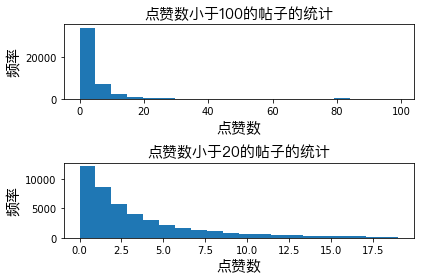

In [51]:
print('八卦数目：', len(gossip_set))
# 对likes属性进行统计
likes_max = np.max(np.array(gossip_set_likes))
print('最大点赞数：', likes_max)
likes_min = np.min(np.array(gossip_set_likes))
print('最少点赞数：', likes_min)
likes_exception = sum(int(i)>100 for i in gossip_set_likes)
print('点赞数超过100的帖子的个数: ', likes_exception)
likes_zero = sum(int(i)==0 for i in gossip_set_likes)
print('点赞数为0的帖子的个数: ', likes_zero)
plt.figure()
plt.subplot(211)
plt.hist(np.array([i for i in gossip_set_likes if i < 100]), bins=20)
plt.xlabel('点赞数', fontproperties=getChineseFont())
plt.ylabel('频率', fontproperties=getChineseFont())
plt.title('点赞数小于100的帖子的统计', fontproperties=getChineseFont())
plt.subplot(212)
plt.hist(np.array([i for i in gossip_set_likes if i < 20]), bins=20)
plt.xlabel('点赞数', fontproperties=getChineseFont())
plt.ylabel('频率', fontproperties=getChineseFont())
plt.title('点赞数小于20的帖子的统计', fontproperties=getChineseFont())
plt.tight_layout()

In [41]:
# 取点赞数前10的帖子，看一下内容
gossip_set_likes_texts = zip(gossip_set_likes, gossip_set_texts)
gossip_set_likes_texts = sorted(gossip_set_likes_texts, key=lambda x: x[0], reverse=True)
tmp = gossip_set_likes_texts[0:10]
print('\n\n'.join(list(zip(*tmp))[1]))

刚刚接到华为海思的面试邀请，不是很了解。各位大兄弟，海狮福利待遇、发展各方面肿么样？

校招投的是sdn开发岗位，这几天大队培训后才发现被分配到硬件测试的岗位，测试也就罢了，还是硬件的…华为hr脑子有洞！

见到今天腾讯新闻报道，周群飞女士成为中国女首富！！！从去年一直关注的蓝思科技，直至周群飞女强人成为中国女首富！悟:只有经历最苦的坚持，才配得起最持久的幸福，也许选择对了，越拼越有戏！“姑娘，您什么看”！

美团为什么没有年会......为什么为什么为什么！最近朋友圈全别人晒的年会[冷汗][冷汗][冷汗]

阿里猎头比阿里HR还屌，发了offer问我去不去，我说级别感觉有点低，别的猎头给找的职位都是P7以上，她说你就这水平，P7要博士并5年工作经验以上，其他都是P6...好吧，强势猎头强势企业，惹不起惹不起，最后她还洋洋得意的说上周她还成了一个P9的，我猜可能是杨振宁本人吧[挖鼻屎]

京东员工租不起房子了，怎么搞

2018年想去阿里巴巴/腾讯海外事业部，商务岗ToB类，可以驻外可以出差，东南亚、非洲、欧美，都可以。传统行业8年国际事务经验+211本澳洲硕，有没有机会？形象气质不错，人品端正工作踏实。



看看支付宝运动的排行榜，这是什么情况？不显示排行榜的话，就不会出现在榜里了，可是这个有显示步数，具体什么原因（没有删除好友，也不是网络原因。）

工作两年面试阿里的p6，在工作经验上来看，可否对标？[可怜][可怜][可怜]

58同城 T5 23k 加500股 测试开发职位 年薪比之前就多了2000块 值得去么？还是再和58还还价？T5的范围大概是多少？


In [44]:
# 看一下是否一人发多个贴，如果有，看下这些帖子的热度和内容
from collections import Counter
username_counter = Counter(gossip_set_usernames)
username_counter = sorted(username_counter.items(), key=lambda x: x[1], reverse=True)
username_counter[:10]

[('****', 4654),
 ('百度员工', 980),
 ('灰太狼', 356),
 ('美团员工', 331),
 ('诸葛瑾', 330),
 ('苏星河', 329),
 ('黑白子', 317),
 ('懒羊羊', 311),
 ('京东员工', 308),
 ('喜羊羊', 305)]

In [73]:
# 找出百度员工的帖子
gossip_set_usernames_texts = zip(gossip_set_usernames, gossip_set_likes, gossip_set_texts)
gossip_set_bdyg_texts = [i for i in gossip_set_usernames_texts if i[0] == '百度员工']
gossip_set_bdyg_texts = sorted(gossip_set_bdyg_texts, key=lambda x: x[1], reverse=True)
gossip_set_bdyg_texts[:100]

[('百度员工', 378, '来百度三个月了，第一个月新鲜，第二个月开始每天都想走[笑哭]有没有跟我一样的'),
 ('百度员工', 276, '今年以来，领导带的技术方向没一个是对的，净做些没卵用的活，还时常自己挖坑自己填。坐等他被大领导开除~ '),
 ('百度员工',
  261,
  '真心觉得在百度挺好的，去年在腾讯感觉工作真的好压抑，与同事难相处，到百度来感觉好太多。那些说百度不行了的随他说去吧，我工作的开心最重要'),
 ('百度员工', 223, '百度feed策略端组织调整，了解内情的来说说'),
 ('百度员工', 201, '买了一个微博账号，大概有3万粉丝（粉丝粘度非常高），价钱是：7000元。你们觉得合理吗？'),
 ('百度员工',
  198,
  '今天去面一个创业公司，是即将离职的人面我也是醉了。然后告诉我公司很乱，部门和部门之间的斗争很厉害，还问我认识他们公司老大不，我说认识是认识，不熟。问我有多不熟，我说也就见面打个招呼那种。感觉公司帮派严重，他是诺基亚的，公司老大是百度的，感觉自己铁定没戏了，他都要混不下去了。'),
 ('百度员工', 197, '百度至今erp未更新去难道真的要下个月更新，然后把涨薪放到下个月吗？少发一个月的涨薪工资，鸡贼啊。'),
 ('百度员工', 186, '北京百度PMO…BAT上海有坑么？想去上海，PM，PMO，活动运营都可以哈'),
 ('百度员工', 178, '问一下腾讯omg 事业部是不是在裁员 乱不乱 情况怎么样啊 '),
 ('百度员工', 160, '百度和阿里有消息要一起宣布'),
 ('百度员工', 159, '面阿里的测试开发，哪个团队的面试会快一点。面试间隔时间也太长了'),
 ('百度员工', 153, '360 AI lab面试体验很好，副院长面试，人很不错'),
 ('百度员工', 139, '百度社保公积金是按照16k的基础交吗。。。。'),
 ('百度员工', 136, '百度校招只给了接收函稳不稳？'),
 ('百度员工', 134, '马上入职百度，好紧张啊[做鬼脸][做鬼脸][做鬼脸]'),
 ('百度员工',
  131,
  '来北京三周了，手上的皮脱完一层后开始脱第二层，这中间还流了两次鼻血，讲真的不知道秋冬季要怎么死呢，可是我才进百度两周，是要回上海

In [66]:
# 词频统计，所有数据/点赞数超过100/点赞数大于0
import jieba
gossip_set_words = []
for i in gossip_set_texts:
    seg_words = list(jieba.cut(i))
    gossip_set_words += seg_words
words_freq_counter = Counter(gossip_set_words)
words_freq_counter = sorted(words_freq_counter.items(), key=lambda x: x[1], reverse=True)

In [70]:
words_freq_counter = [i for i in words_freq_counter if len(i[0]) >= 2]
words_freq_counter[:50]

[('百度', 12017),
 ('阿里', 8912),
 ('腾讯', 6979),
 ('公司', 6676),
 ('京东', 5983),
 ('什么', 5902),
 ('美团', 5862),
 ('面试', 4629),
 ('一个', 4168),
 ('现在', 3788),
 ('工作', 3491),
 ('怎么', 3415),
 ('知道', 3136),
 ('没有', 3032),
 ('网易', 2999),
 ('offer', 2944),
 ('小米', 2920),
 ('产品', 2916),
 ('还是', 2912),
 ('多少', 2806),
 ('头条', 2698),
 ('微信', 2680),
 ('怎么样', 2530),
 ('可以', 2492),
 ('部门', 2424),
 ('华为', 2289),
 ('自己', 2282),
 ('大家', 2168),
 ('技术', 2157),
 ('一下', 2057),
 ('这个', 2026),
 ('是不是', 2002),
 ('吐血', 1967),
 ('感觉', 1889),
 ('360', 1864),
 ('员工', 1818),
 ('薪资', 1814),
 ('你们', 1807),
 ('运营', 1783),
 ('就是', 1714),
 ('今日', 1657),
 ('互联网', 1606),
 ('哪个', 1599),
 ('还有', 1589),
 ('今天', 1579),
 ('北京', 1565),
 ('有没有', 1542),
 ('这么', 1510),
 ('支付宝', 1508),
 ('不是', 1498)]

In [75]:
# 词频统计，点赞数超过0
# todo
gossip_set_likes_texts = zip(gossip_set_likes, gossip_set_texts)
gossip_set_likes_texts_0 = [i for i in gossip_set_likes_texts if i[0] > 0]
gossip_set_texts_0 = list(zip(*gossip_set_likes_texts_0))[1]
gossip_set_texts_0
import jieba
gossip_set_words_0 = []
for i in gossip_set_texts_0:
    seg_words = list(jieba.cut(i))
    gossip_set_words_0 += seg_words
words_freq_counter_0 = Counter(gossip_set_words_0)
words_freq_counter_0 = sorted(words_freq_counter_0.items(), key=lambda x: x[1], reverse=True)

In [76]:
words_freq_counter_0 = [i for i in words_freq_counter_0 if len(i[0]) >= 2]
words_freq_counter_0[:50]

[('百度', 9091),
 ('阿里', 6711),
 ('腾讯', 5151),
 ('公司', 5020),
 ('京东', 4495),
 ('美团', 4451),
 ('什么', 4428),
 ('面试', 3443),
 ('一个', 3178),
 ('现在', 2931),
 ('工作', 2610),
 ('怎么', 2587),
 ('知道', 2341),
 ('网易', 2234),
 ('小米', 2233),
 ('没有', 2230),
 ('还是', 2200),
 ('offer', 2190),
 ('产品', 2151),
 ('多少', 2122),
 ('微信', 2020),
 ('头条', 1992),
 ('怎么样', 1928),
 ('可以', 1854),
 ('部门', 1801),
 ('华为', 1721),
 ('自己', 1693),
 ('技术', 1646),
 ('大家', 1594),
 ('一下', 1554),
 ('这个', 1515),
 ('是不是', 1496),
 ('吐血', 1491),
 ('感觉', 1452),
 ('薪资', 1421),
 ('员工', 1390),
 ('运营', 1383),
 ('360', 1381),
 ('你们', 1341),
 ('就是', 1280),
 ('哪个', 1250),
 ('还有', 1226),
 ('今天', 1207),
 ('今日', 1207),
 ('互联网', 1190),
 ('北京', 1165),
 ('有没有', 1164),
 ('支付宝', 1151),
 ('这么', 1134),
 ('不是', 1109)]

In [77]:
# 词频统计，点赞数大于100
# todo
gossip_set_likes_texts = zip(gossip_set_likes, gossip_set_texts)
gossip_set_likes_texts_100 = [i for i in gossip_set_likes_texts if i[0] > 0]
gossip_set_texts_100 = list(zip(*gossip_set_likes_texts_100))[1]
gossip_set_texts_100
import jieba
gossip_set_words_100 = []
for i in gossip_set_texts_100:
    seg_words = list(jieba.cut(i))
    gossip_set_words_100 += seg_words
words_freq_counter_100 = Counter(gossip_set_words_100)
words_freq_counter_100 = sorted(words_freq_counter_100.items(), key=lambda x: x[1], reverse=True)

In [78]:
words_freq_counter_100 = [i for i in words_freq_counter_100 if len(i[0]) >= 2]
words_freq_counter_100[:50]

[('百度', 9091),
 ('阿里', 6711),
 ('腾讯', 5151),
 ('公司', 5020),
 ('京东', 4495),
 ('美团', 4451),
 ('什么', 4428),
 ('面试', 3443),
 ('一个', 3178),
 ('现在', 2931),
 ('工作', 2610),
 ('怎么', 2587),
 ('知道', 2341),
 ('网易', 2234),
 ('小米', 2233),
 ('没有', 2230),
 ('还是', 2200),
 ('offer', 2190),
 ('产品', 2151),
 ('多少', 2122),
 ('微信', 2020),
 ('头条', 1992),
 ('怎么样', 1928),
 ('可以', 1854),
 ('部门', 1801),
 ('华为', 1721),
 ('自己', 1693),
 ('技术', 1646),
 ('大家', 1594),
 ('一下', 1554),
 ('这个', 1515),
 ('是不是', 1496),
 ('吐血', 1491),
 ('感觉', 1452),
 ('薪资', 1421),
 ('员工', 1390),
 ('运营', 1383),
 ('360', 1381),
 ('你们', 1341),
 ('就是', 1280),
 ('哪个', 1250),
 ('还有', 1226),
 ('今天', 1207),
 ('今日', 1207),
 ('互联网', 1190),
 ('北京', 1165),
 ('有没有', 1164),
 ('支付宝', 1151),
 ('这么', 1134),
 ('不是', 1109)]